<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Eliciting-and-Loading-Data-from-Official-Sources" data-toc-modified-id="Eliciting-and-Loading-Data-from-Official-Sources-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Eliciting and Loading Data from Official Sources</a></span><ul class="toc-item"><li><span><a href="#Confirmed-Global-Cases" data-toc-modified-id="Confirmed-Global-Cases-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Confirmed Global Cases</a></span></li><li><span><a href="#Number-of-Death-Cases---Global" data-toc-modified-id="Number-of-Death-Cases---Global-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Number of Death Cases - Global</a></span></li><li><span><a href="#Number-of-recovered-cases---Global" data-toc-modified-id="Number-of-recovered-cases---Global-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Number of recovered cases - Global</a></span></li><li><span><a href="#US-Confirmed-Cases" data-toc-modified-id="US-Confirmed-Cases-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>US Confirmed Cases</a></span></li><li><span><a href="#US-Death-Cases" data-toc-modified-id="US-Death-Cases-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>US Death Cases</a></span></li><li><span><a href="#Country-specific-Data" data-toc-modified-id="Country-specific-Data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Country-specific Data</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Rename-columns-to-work-easily" data-toc-modified-id="Rename-columns-to-work-easily-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Rename columns to work easily</a></span></li><li><span><a href="#aggregate-numbers-for-each-category-of-cases" data-toc-modified-id="aggregate-numbers-for-each-category-of-cases-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>aggregate numbers for each category of cases</a></span></li><li><span><a href="#Display-countries-sorted-by-the-total-number-of-confirmed-cases." data-toc-modified-id="Display-countries-sorted-by-the-total-number-of-confirmed-cases.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Display countries sorted by the total number of confirmed cases.</a></span></li><li><span><a href="#worst-affected-countries" data-toc-modified-id="worst-affected-countries-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>worst-affected countries</a></span></li><li><span><a href="#daily-confirmed-and-death-cases-based-on-country" data-toc-modified-id="daily-confirmed-and-death-cases-based-on-country-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>daily confirmed and death cases based on country</a></span></li><li><span><a href="#Top-10-worst-impected-countries" data-toc-modified-id="Top-10-worst-impected-countries-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Top 10 worst impected countries</a></span><ul class="toc-item"><li><span><a href="#Confirmed-cases" data-toc-modified-id="Confirmed-cases-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Confirmed cases</a></span></li><li><span><a href="#Death-cases" data-toc-modified-id="Death-cases-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Death cases</a></span></li><li><span><a href="#Recovered-cases" data-toc-modified-id="Recovered-cases-2.6.3"><span class="toc-item-num">2.6.3&nbsp;&nbsp;</span>Recovered cases</a></span></li><li><span><a href="#Active-cases" data-toc-modified-id="Active-cases-2.6.4"><span class="toc-item-num">2.6.4&nbsp;&nbsp;</span>Active cases</a></span></li><li><span><a href="#Mortality-cases" data-toc-modified-id="Mortality-cases-2.6.5"><span class="toc-item-num">2.6.5&nbsp;&nbsp;</span>Mortality cases</a></span></li></ul></li><li><span><a href="#Interactive-Global-map" data-toc-modified-id="Interactive-Global-map-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Interactive Global map</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go



from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
# from IPython.core.display import display, HTML

import matplotlib.pyplot as plt
import folium
import seaborn as sns
import ipywidgets as widgets

# Predicting disease outbreaks with time-series analysis

## Eliciting and Loading Data from Official Sources

We load the datasets from raw files based on Johns Hopkins data repository. We load raw files directly from GitHub so our analysis always runs on updated data. 
We have two types of datasets:
- Global data. The datasets contain daily time series summary tables, including confirmed, deaths and recovered for each country. All data is read in from of the daily case report. 
- US data. Two time series tables are for the US confirmed cases and deaths, reported at the county level. They are named time_series_covid19_confirmed_US.csv, time_series_covid19_deaths_US.csv, respectively.


### Confirmed Global Cases

In [2]:
confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
display(confirmed_df.head())
display(confirmed_df.info(verbose=True, show_counts=True))
display(confirmed_df.describe())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56254,56290,56294,56322,56384,56454,56517,56572,56595,56676
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,123216,123641,124134,124419,124723,125157,125506,125842,126183,126531
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,116657,116750,116836,116946,117061,117192,117304,117429,117524,117622
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11732,11809,11850,11888,11944,12010,12053,12115,12174,12231
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,21961,22031,22063,22132,22182,22311,22399,22467,22579,22631


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 443 columns):
 #    Column          Non-Null Count  Dtype  
---   ------          --------------  -----  
 0    Province/State  85 non-null     object 
 1    Country/Region  274 non-null    object 
 2    Lat             273 non-null    float64
 3    Long            273 non-null    float64
 4    1/22/20         274 non-null    int64  
 5    1/23/20         274 non-null    int64  
 6    1/24/20         274 non-null    int64  
 7    1/25/20         274 non-null    int64  
 8    1/26/20         274 non-null    int64  
 9    1/27/20         274 non-null    int64  
 10   1/28/20         274 non-null    int64  
 11   1/29/20         274 non-null    int64  
 12   1/30/20         274 non-null    int64  
 13   1/31/20         274 non-null    int64  
 14   2/1/20          274 non-null    int64  
 15   2/2/20          274 non-null    int64  
 16   2/3/20          274 non-null    int64  
 17   2/4/20        

None

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21
count,273.000000,273.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,...,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02
mean,20.534804,23.028143,2.032847,2.390511,3.434307,5.229927,7.729927,10.682482,20.357664,22.507299,...,4.603345e+05,4.624654e+05,4.641822e+05,4.658572e+05,4.679306e+05,4.704234e+05,4.730206e+05,4.753157e+05,4.772613e+05,4.792758e+05
std,25.194592,73.596166,26.879101,26.977077,33.585238,46.743494,65.324493,88.014971,215.981285,217.304706,...,2.177760e+06,2.184772e+06,2.189957e+06,2.195954e+06,2.202630e+06,2.210443e+06,2.219010e+06,2.226723e+06,2.233255e+06,2.238855e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.152149,-19.020800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.021500e+03,1.025250e+03,1.031250e+03,1.043750e+03,1.043750e+03,1.043750e+03,1.044500e+03,1.061250e+03,1.063500e+03,1.067000e+03
50%,21.694000,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.443450e+04,1.443450e+04,1.443450e+04,1.443450e+04,1.443450e+04,1.494700e+04,1.494700e+04,1.494700e+04,1.494700e+04,1.494700e+04
75%,41.112900,84.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.954990e+05,1.973580e+05,1.983818e+05,1.989432e+05,1.995325e+05,2.000568e+05,2.008212e+05,2.014185e+05,2.022030e+05,2.028822e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,3.015737e+07,3.021945e+07,3.026314e+07,3.033256e+07,3.039380e+07,3.046083e+07,3.053987e+07,3.060969e+07,3.067184e+07,3.070613e+07


### Number of Death Cases - Global

In [3]:
deaths_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
display(deaths_df.head())
display(deaths_df.info(verbose=True, show_counts=True))
display(deaths_df.describe())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2467,2469,2470,2472,2476,2484,2489,2495,2496,2497
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2192,2204,2210,2216,2227,2235,2241,2247,2256,2265
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3074,3077,3080,3084,3089,3093,3096,3099,3102,3105
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,114,115,115,115,115,115,115,116,117,117
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,532,533,533,534,536,537,538,538,540,542


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 443 columns):
 #    Column          Non-Null Count  Dtype  
---   ------          --------------  -----  
 0    Province/State  85 non-null     object 
 1    Country/Region  274 non-null    object 
 2    Lat             273 non-null    float64
 3    Long            273 non-null    float64
 4    1/22/20         274 non-null    int64  
 5    1/23/20         274 non-null    int64  
 6    1/24/20         274 non-null    int64  
 7    1/25/20         274 non-null    int64  
 8    1/26/20         274 non-null    int64  
 9    1/27/20         274 non-null    int64  
 10   1/28/20         274 non-null    int64  
 11   1/29/20         274 non-null    int64  
 12   1/30/20         274 non-null    int64  
 13   1/31/20         274 non-null    int64  
 14   2/1/20          274 non-null    int64  
 15   2/2/20          274 non-null    int64  
 16   2/3/20          274 non-null    int64  
 17   2/4/20        

None

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21
count,273.000000,273.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,...,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,20.534804,23.028143,0.062044,0.065693,0.094891,0.153285,0.204380,0.299270,0.478102,0.485401,...,10100.967153,10136.697080,10160.288321,10189.306569,10231.500000,10276.251825,10319.540146,10356.602190,10387.332117,10412.361314
std,25.194592,73.596166,1.027008,1.028562,1.451957,2.417550,3.142847,4.592341,7.551622,7.552125,...,43586.262439,43732.767819,43814.130649,43908.519085,44078.885723,44259.654103,44435.573436,44581.538159,44686.209822,44750.656917
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.152149,-19.020800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.250000,7.250000,7.250000,7.250000,7.250000,8.000000,8.000000,8.250000,8.250000,8.250000
50%,21.694000,20.939400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,181.000000,181.000000,181.000000,181.000000,182.000000,182.000000,182.500000,182.500000,183.000000,183.000000
75%,41.112900,84.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3000.750000,3003.000000,3003.000000,3003.000000,3011.750000,3011.750000,3012.500000,3012.500000,3013.250000,3014.750000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,548206.000000,548947.000000,549454.000000,550155.000000,551030.000000,552106.000000,553170.000000,554103.000000,554779.000000,555001.000000


### Number of recovered cases - Global

In [4]:
recovered_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
display(recovered_df.head())
display(recovered_df.info(verbose=True, show_counts=True))
display(recovered_df.describe())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,49994,49994,50013,50666,51473,51550,51788,51798,51802,51885
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,88349,88899,89456,90024,90617,91271,91875,92500,93173,93842
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,81160,81242,81316,81349,81442,81538,81632,81729,81813,81896
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11149,11172,11204,11244,11276,11315,11365,11401,11428,11474
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20250,20269,20289,20380,20446,20493,20508,20867,20871,20879


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 443 columns):
 #    Column          Non-Null Count  Dtype  
---   ------          --------------  -----  
 0    Province/State  69 non-null     object 
 1    Country/Region  259 non-null    object 
 2    Lat             259 non-null    float64
 3    Long            259 non-null    float64
 4    1/22/20         259 non-null    int64  
 5    1/23/20         259 non-null    int64  
 6    1/24/20         259 non-null    int64  
 7    1/25/20         259 non-null    int64  
 8    1/26/20         259 non-null    int64  
 9    1/27/20         259 non-null    int64  
 10   1/28/20         259 non-null    int64  
 11   1/29/20         259 non-null    int64  
 12   1/30/20         259 non-null    int64  
 13   1/31/20         259 non-null    int64  
 14   2/1/20          259 non-null    int64  
 15   2/2/20          259 non-null    int64  
 16   2/3/20          259 non-null    int64  
 17   2/4/20        

None

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000,...,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02,2.590000e+02
mean,19.102739,28.495821,0.115830,0.123552,0.150579,0.162162,0.216216,0.250965,0.416988,0.490347,...,2.759192e+05,2.770977e+05,2.783671e+05,2.795426e+05,2.808215e+05,2.822830e+05,2.835970e+05,2.848085e+05,2.862158e+05,2.875502e+05
std,24.640880,70.936043,1.743788,1.747697,1.940118,2.005022,2.641273,2.839838,5.005023,5.505010,...,1.080969e+06,1.085416e+06,1.089808e+06,1.093001e+06,1.098028e+06,1.104350e+06,1.109635e+06,1.113932e+06,1.119378e+06,1.123187e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.715658,-8.826999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.565000e+02,8.645000e+02,8.645000e+02,8.645000e+02,8.645000e+02,8.655000e+02,8.655000e+02,8.660000e+02,8.760000e+02,8.760000e+02
50%,19.856270,24.603200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.330000e+03,9.391000e+03,9.454000e+03,9.594000e+03,9.594000e+03,9.668000e+03,9.710000e+03,9.749000e+03,9.779000e+03,9.835000e+03
75%,39.018950,90.394950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.435825e+05,1.439630e+05,1.451285e+05,1.460390e+05,1.468215e+05,1.474965e+05,1.482600e+05,1.488735e+05,1.493310e+05,1.498060e+05
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,1.129502e+07,1.132376e+07,1.135599e+07,1.139302e+07,1.143430e+07,1.147468e+07,1.152504e+07,1.156924e+07,1.162929e+07,1.168214e+07


### US Confirmed Cases

In [5]:
us_confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
display(us_confirmed_df.head())
display(us_confirmed_df.info(verbose=True, show_counts=True))
display(us_confirmed_df.describe())

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,6543,6562,6570,6577,6580,6589,6595,6606,6617,6619
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,20423,20453,20473,20487,20492,20505,20523,20519,20526,20541
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,2221,2224,2226,2226,2227,2227,2227,2228,2231,2232
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,2535,2535,2536,2536,2537,2542,2543,2544,2545,2546
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,6415,6420,6424,6426,6443,6444,6446,6455,6458,6459


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 450 columns):
 #    Column          Non-Null Count  Dtype  
---   ------          --------------  -----  
 0    UID             3342 non-null   int64  
 1    iso2            3342 non-null   object 
 2    iso3            3342 non-null   object 
 3    code3           3342 non-null   int64  
 4    FIPS            3332 non-null   float64
 5    Admin2          3336 non-null   object 
 6    Province_State  3342 non-null   object 
 7    Country_Region  3342 non-null   object 
 8    Lat             3342 non-null   float64
 9    Long_           3342 non-null   float64
 10   Combined_Key    3342 non-null   object 
 11   1/22/20         3342 non-null   int64  
 12   1/23/20         3342 non-null   int64  
 13   1/24/20         3342 non-null   int64  
 14   1/25/20         3342 non-null   int64  
 15   1/26/20         3342 non-null   int64  
 16   1/27/20         3342 non-null   int64  
 17   1/28/20     

None

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21
count,3.342000e+03,3342.000000,3332.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,...,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03
mean,8.342992e+07,834.494913,33043.078932,36.721617,-88.642045,0.000299,0.000299,0.000598,0.000598,0.001496,...,9.023750e+03,9.042325e+03,9.055399e+03,9.076171e+03,9.094496e+03,9.114552e+03,9.138201e+03,9.159093e+03,9.177691e+03,9.187949e+03
std,4.314076e+06,36.487378,18648.808931,9.079322,21.776287,0.017298,0.017298,0.024459,0.024459,0.038656,...,3.375406e+04,3.380516e+04,3.384944e+04,3.389886e+04,3.394123e+04,3.399116e+04,3.404889e+04,3.410253e+04,3.414533e+04,3.417465e+04
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.401811e+07,840.000000,19076.500000,33.896803,-97.803595,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.572500e+02,8.582500e+02,8.592500e+02,8.605000e+02,8.622500e+02,8.630000e+02,8.650000e+02,8.662500e+02,8.670000e+02,8.670000e+02
50%,8.402921e+07,840.000000,31012.000000,38.005610,-89.488865,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.189500e+03,2.198000e+03,2.201000e+03,2.207000e+03,2.208000e+03,2.210500e+03,2.213000e+03,2.215000e+03,2.217500e+03,2.217500e+03
75%,8.404612e+07,840.000000,47129.500000,41.579255,-82.313398,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.673500e+03,5.673500e+03,5.684250e+03,5.691750e+03,5.693000e+03,5.727250e+03,5.739000e+03,5.742250e+03,5.751500e+03,5.753000e+03
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.217116e+06,1.217775e+06,1.218229e+06,1.218643e+06,1.219029e+06,1.219614e+06,1.220256e+06,1.220893e+06,1.220893e+06,1.220893e+06


### US Death Cases

In [6]:
us_death_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")
display(us_death_df.head())
display(us_death_df.info(verbose=True, show_counts=True))
display(us_death_df.describe())

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,99,99,99,99,99,99,99,99,102,102
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,301,301,301,301,301,301,301,301,301,301
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,54,54,54,54,54,55,55,55,55,55
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,58,58,58,58,58,58,58,58,58,58
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,131,131,131,131,131,131,131,132,132,132


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 451 columns):
 #    Column          Non-Null Count  Dtype  
---   ------          --------------  -----  
 0    UID             3342 non-null   int64  
 1    iso2            3342 non-null   object 
 2    iso3            3342 non-null   object 
 3    code3           3342 non-null   int64  
 4    FIPS            3332 non-null   float64
 5    Admin2          3336 non-null   object 
 6    Province_State  3342 non-null   object 
 7    Country_Region  3342 non-null   object 
 8    Lat             3342 non-null   float64
 9    Long_           3342 non-null   float64
 10   Combined_Key    3342 non-null   object 
 11   Population      3342 non-null   int64  
 12   1/22/20         3342 non-null   int64  
 13   1/23/20         3342 non-null   int64  
 14   1/24/20         3342 non-null   int64  
 15   1/25/20         3342 non-null   int64  
 16   1/26/20         3342 non-null   int64  
 17   1/27/20     

None

,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21
count,3.342000e+03,3342.000000,3332.000000,3342.000000,3342.000000,3.342000e+03,3342.0,3342.0,3342.0,3342.0,...,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000
mean,8.342992e+07,834.494913,33043.078932,36.721617,-88.642045,9.960357e+04,0.0,0.0,0.0,0.0,...,164.035308,164.257032,164.408737,164.618492,164.880311,165.202274,165.520646,165.799820,166.002095,166.068522
std,4.314076e+06,36.487378,18648.808931,9.079322,21.776287,3.241661e+05,0.0,0.0,0.0,0.0,...,653.211620,654.149124,654.986704,655.596238,656.305867,657.421838,658.758351,660.012395,660.531607,660.913442
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000e+00,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.401811e+07,840.000000,19076.500000,33.896803,-97.803595,9.917250e+03,0.0,0.0,0.0,0.0,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
50%,8.402921e+07,840.000000,31012.000000,38.005610,-89.488865,2.489150e+04,0.0,0.0,0.0,0.0,...,41.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
75%,8.404612e+07,840.000000,47129.500000,41.579255,-82.313398,6.497525e+04,0.0,0.0,0.0,0.0,...,101.750000,101.750000,101.750000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,1.003911e+07,0.0,0.0,0.0,0.0,...,23056.000000,23080.000000,23103.000000,23101.000000,23111.000000,23144.000000,23191.000000,23236.000000,23236.000000,23236.000000


### Country-specific Data

In [7]:
country_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
display(country_df.head())
display(country_df.info(verbose=True, show_counts=True))
display(country_df.describe())

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2021-04-05 21:20:47,33.93911,67.709953,56717.0,2508.0,51902.0,2307.0,145.695908,NaN,NaN,4.421955,4,AFG
1,Albania,2021-04-05 21:20:47,41.15330,20.168300,126795.0,2274.0,94431.0,30090.0,4405.969838,NaN,NaN,1.793446,8,ALB
2,Algeria,2021-04-05 21:20:47,28.03390,1.659600,117622.0,3105.0,81896.0,32621.0,268.230792,NaN,NaN,2.639812,12,DZA
3,Andorra,2021-04-05 21:20:47,42.50630,1.521800,12286.0,117.0,11523.0,646.0,15901.119524,NaN,NaN,0.952303,20,AND
4,Angola,2021-04-05 21:20:47,-11.20270,17.873900,22631.0,542.0,20879.0,1210.0,68.857833,NaN,NaN,2.394945,24,AGO


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       192 non-null    object 
 1   Last_Update          192 non-null    object 
 2   Lat                  190 non-null    float64
 3   Long_                190 non-null    float64
 4   Confirmed            192 non-null    float64
 5   Deaths               192 non-null    float64
 6   Recovered            188 non-null    float64
 7   Active               191 non-null    float64
 8   Incident_Rate        190 non-null    float64
 9   People_Tested        0 non-null      float64
 10  People_Hospitalized  0 non-null      float64
 11  Mortality_Rate       192 non-null    float64
 12  UID                  192 non-null    int64  
 13  ISO3                 190 non-null    object 
dtypes: float64(10), int64(1), object(3)
memory usage: 21.1+ KB


None

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID
count,190.000000,190.000000,1.920000e+02,192.000000,1.880000e+02,1.910000e+02,190.000000,0.0,0.0,192.000000,192.000000
mean,19.515850,19.770528,6.854820e+05,14879.114583,3.973915e+05,1.247758e+05,2746.437360,NaN,NaN,2.043534,518.145833
std,23.914666,62.027648,2.656453e+06,52935.211861,1.306386e+06,5.213942e+05,3298.111446,NaN,NaN,2.369924,953.673240
min,-40.900600,-172.104600,1.000000e+00,0.000000,1.000000e+00,0.000000e+00,0.673488,NaN,NaN,0.000000,4.000000
25%,4.643279,-6.706225,8.566500e+03,112.750000,5.719750e+03,3.995000e+02,159.518466,NaN,NaN,0.961834,207.000000
50%,17.589241,20.535638,8.220600e+04,1009.000000,4.895100e+04,5.047000e+03,1349.251843,NaN,NaN,1.656402,424.000000
75%,40.383525,46.701734,3.114675e+05,6296.750000,2.237012e+05,3.275600e+04,4823.938179,NaN,NaN,2.514691,649.250000
max,64.963100,178.065000,3.076937e+07,555377.000000,1.168214e+07,4.490073e+06,15901.119524,NaN,NaN,22.222222,9999.000000


### Conclusion
We can use above data to forecast the evolution of the covid-19 pandemic. We can find most affected countries from country_df.

## Exploratory data analysis

### Rename columns to work easily

In [8]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/26/21', '3/27/21', '3/28/21', '3/29/21', '3/30/21', '3/31/21',
       '4/1/21', '4/2/21', '4/3/21', '4/4/21'],
      dtype='object', length=443)

In [9]:
deaths_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/26/21', '3/27/21', '3/28/21', '3/29/21', '3/30/21', '3/31/21',
       '4/1/21', '4/2/21', '4/3/21', '4/4/21'],
      dtype='object', length=443)

In [10]:
recovered_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '3/26/21', '3/27/21', '3/28/21', '3/29/21', '3/30/21', '3/31/21',
       '4/1/21', '4/2/21', '4/3/21', '4/4/21'],
      dtype='object', length=443)

In [11]:
us_confirmed_df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '3/26/21', '3/27/21', '3/28/21', '3/29/21', '3/30/21', '3/31/21',
       '4/1/21', '4/2/21', '4/3/21', '4/4/21'],
      dtype='object', length=450)

In [12]:
us_death_df.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '3/26/21', '3/27/21', '3/28/21', '3/29/21', '3/30/21', '3/31/21',
       '4/1/21', '4/2/21', '4/3/21', '4/4/21'],
      dtype='object', length=451)

In [13]:
country_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [14]:
def lower_col(df:pd.DataFrame):
    column_names = {col:col.lower() for col in df.columns}
    new_df = df.rename(columns=column_names)
    return new_df

In [15]:
confirmed_df.rename(columns={'Country/Region': 'country', 'Province/State': 'state'}, inplace=True)
confirmed_df = lower_col(confirmed_df)
deaths_df.rename(columns={'Country/Region': 'country', 'Province/State': 'state'}, inplace=True)
deaths_df = lower_col(deaths_df)
recovered_df.rename(columns={'Country/Region': 'country', 'Province/State': 'state'}, inplace=True)
recovered_df = lower_col(recovered_df)
us_confirmed_df.rename(columns={'Country_Region':'country', 'Province_State': 'state'}, inplace=True)
us_confirmed_df = lower_col(us_confirmed_df)
us_death_df.rename(columns={'Country_Region':'country', 'Province_State': 'state'}, inplace=True)
us_death_df = lower_col(us_death_df)
country_df.rename(columns={'Country_Region': 'country', 'Last_Update': 'update'}, inplace=True)
country_df = lower_col(country_df)

In [16]:
country_df.head()

,country,update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
0,Afghanistan,2021-04-05 21:20:47,33.93911,67.709953,56717.0,2508.0,51902.0,2307.0,145.695908,NaN,NaN,4.421955,4,AFG
1,Albania,2021-04-05 21:20:47,41.15330,20.168300,126795.0,2274.0,94431.0,30090.0,4405.969838,NaN,NaN,1.793446,8,ALB
2,Algeria,2021-04-05 21:20:47,28.03390,1.659600,117622.0,3105.0,81896.0,32621.0,268.230792,NaN,NaN,2.639812,12,DZA
3,Andorra,2021-04-05 21:20:47,42.50630,1.521800,12286.0,117.0,11523.0,646.0,15901.119524,NaN,NaN,0.952303,20,AND
4,Angola,2021-04-05 21:20:47,-11.20270,17.873900,22631.0,542.0,20879.0,1210.0,68.857833,NaN,NaN,2.394945,24,AGO


### aggregate numbers for each category of cases

confirmed    131612552
deaths         2856790
recovered     74709596
active        23832174
dtype: int64

<AxesSubplot:>

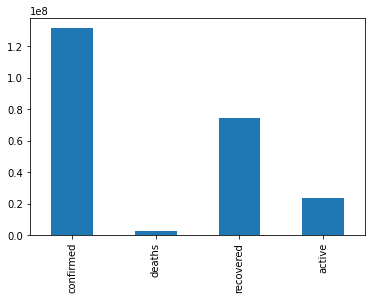

In [17]:
t = country_df[['confirmed', 'deaths', 'recovered', 'active']].sum().round(0).astype(int)
display(t)
t.plot(kind='bar')

### Display countries sorted by the total number of confirmed cases.
By choosing the desired column (confirmed, deaths, recovered) and number of rows to dispaly, you will see the n highest countries based on the column that you choosed. 

In [18]:
# dictionary of column colors
coldict = {'confirmed':'yellow', 'deaths':'red', 'recovered': 'green'}

def highlight_columns(s, coldict):
    if s.name in coldict.keys():
        return ['background-color: {}'.format(coldict[s.name])] * len(s)
    return [''] * len(s)

def show_highest(column,n):
    df_ = country_df.sort_values(by=column, ascending= False).head(n).\
    style.format({'confirmed': "{:,.0f}", 'deaths': "{:,.0f}", 'recovered': "{:,.0f}"}).\
    apply(highlight_columns, coldict=coldict)
    return df_

widgets.interact(show_highest, column=['confirmed','deaths','recovered'] , n=np.arange(1,20));

interactive(children=(Dropdown(description='column', options=('confirmed', 'deaths', 'recovered'), value='conf…

### worst-affected countries

In [19]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="country", y="mortality_rate", size="confirmed", color="incident_rate",
               hover_name="country", size_max=60)
    fig.update_layout(
    title=" {} worst-affected countries".format(n),
    xaxis_title="Countries",
    yaxis_title="Mortality rate ",
    width = 700
    )
    fig.show();

interact(bubble_chart, n=20)



interactive(children=(IntSlider(value=20, description='n', max=60, min=-20), Output()), _dom_classes=('widget-…

<function __main__.bubble_chart(n)>

### daily confirmed and death cases based on country

In [20]:
def get_transposed_data(df:pd.DataFrame,country:str, colname:str):
    t = df.append(df.sum(numeric_only=True), ignore_index=True)
    t.loc[t.index[-1], "country"] = 'world'
    cols = [col for col in confirmed_df.columns if col not in['state', 'lat', 'long']]
    t = t[cols].groupby('country').sum().filter(items=[country],axis=0).transpose().rename_axis('date')
    t = t.rename(columns={country:colname})
    t.index = pd.to_datetime(t.index)
    return t
def plot_data(country='world'):
    t1 = get_transposed_data(confirmed_df, country, 'confirmed')
    t2 = get_transposed_data(deaths_df, country, 'deaths')
    t3 = t1.join(t2)
    t3 = t3.reset_index()
    fig = px.line(t3, x="date", y=['confirmed','deaths'])
    fig.show()
countries = ['world'] + list(confirmed_df.country.unique())
widgets.interact(plot_data, country=countries)

interactive(children=(Dropdown(description='country', options=('world', 'Afghanistan', 'Albania', 'Algeria', '…

<function __main__.plot_data(country='world')>

### Top 10 worst impected countries

#### Confirmed cases

In [21]:
px.bar(
    country_df.sort_values('confirmed', ascending= False).head(10),
    x = "country",
    y = "confirmed",
    title= "Top 10 worst affected countries",
    height=500,
    width=800
)

#### Death cases

In [22]:
px.bar(
    country_df.sort_values('deaths', ascending= False).head(10),
    x = "country",
    y = "deaths",
    title= "Top 10 worst affected countries", 
    height=500,
    width=800
)

#### Recovered cases

In [23]:
px.bar(
    country_df.sort_values('recovered', ascending= False).head(10),
    x = "country",
    y = "recovered",
    title= "Top 10 worst affected countries", 
    height=500,
    width=800
)

#### Active cases

In [24]:
px.bar(
    country_df.sort_values('active', ascending= False).head(10),
    x = "country",
    y = "active",
    title= "Top 10 worst affected countries", 
    height=500,
    width=800
)

#### Mortality cases

In [25]:
px.bar(
    country_df.sort_values('mortality_rate', ascending= False).head(10),
    x = "country",
    y = "mortality_rate",
    title= "Top 10 worst affected countries", 
    height=500,
    width=800
)

### Interactive Global map

In [26]:
t = pd.concat([confirmed_df.iloc[:,1:4], confirmed_df.iloc[:,-1:], deaths_df.iloc[:,-1:]], axis=1)
t.columns = ['country', 'lat', 'long', 'confirmed', 'deaths']
t['death_rate'] = t.apply(lambda row: 0 if pd.isna(row['confirmed']) or row['confirmed']==0 else row['deaths']/row['confirmed'] ,axis=1)

t = t.dropna(subset=['lat', 'long']).reset_index(drop=True)

world_map = folium.Map(location=[11,0], zoom_start=2)


for i in range(len(t)):
    row = t.loc[i]
    folium.Circle(
        location=[row['lat'], row['long']],
        fill=True,
        radius=row['confirmed']*.04,
        color='red',
        fill_color='indigo',
        tooltip = "Country = {}, Confirmed cases={}, Death = {}, Death Ratio={}".format(row['country'],\
                                                                                             row['confirmed'],\
                                                                                             row['deaths'],\
                                                                                             np.round(row['death_rate'],2)),
        ).add_to(world_map)

world_map

### Conclusion
The worst impacted countries are US, Brazil and India. We can focous more on these countries in the next sections.